#  Basic Data Science in Python - Exercises 13/10  #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.cluster import DBSCAN, KMeans, Birch, OPTICS

### Exercise  1: Comparing clustering methods
Below you can see the Moons dataset, wich is two half-circles in 2D.

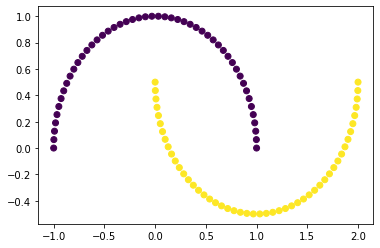

In [2]:
X, y = datasets.make_moons()
plt.scatter(*X.T, c=y)

Try using both DBScan and K-Means to label the two half-circles. Which method creates the correct clustering? Can you explain why?

### Exercise 2: Clustering the Iris Dataset
Use different clustering methods to learn a clustering of the iris dataset. Visualize the clusterings, and use [Purity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score) and [Normalized Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score) (see [this link](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf) for elaboration) to evaluate which clustering method performs the best on the dataset.

Try to tune the hyperparameters to get the best clustering out of each method

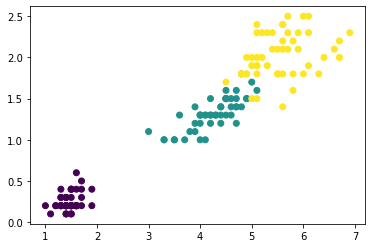

In [3]:
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.cluster import Birch, OPTICS

iris = datasets.load_iris()
X = iris.data
y = iris.target
plt.scatter(*X.T[2:4], c=y)

### Exercise 3: Different Size Clusters (Handin)

Use k-Means to cluster the below dataset. What happens? Which method should you use instead? Use the method you deem most fitting to cluster the dataset.

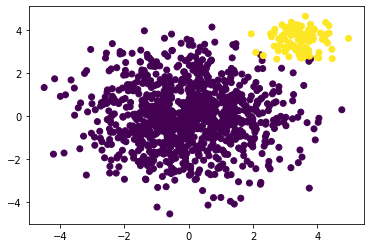

In [5]:
clusters_std = [1.5, 0.5]
X, y = datasets.make_blobs(
    n_samples=[1000, 100],
    centers=[[0.0, 0.0], [3.5, 3.5]],
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)
plt.scatter(*X.T, c=y)

### Exercise 4: Outlier detection
Look at the below dataset. What points do you consider outliers? 

Use Local Outlier Factor to detect the outlier points. How many agrees with your theory?

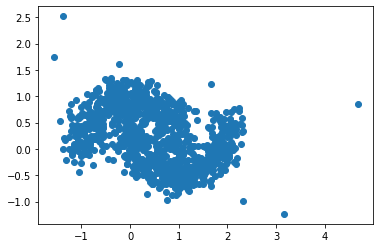

In [6]:
X, y = datasets.make_moons(n_samples=1000, noise=0.2)
for i in np.random.randint(0, 100, size=10):
    X[i] = X[i] * 2
plt.scatter(*X.T)

In [7]:
### YOUR CODE HERE

### Exercise 5: K-Means for Colour Compression
An out-of-the box use of k-Means is using it for image compression. Below is an image that we want to compress to 10 colours. Since the colours can be seen as data points, use k-Means to cluster these together, and only use the cluster centers.

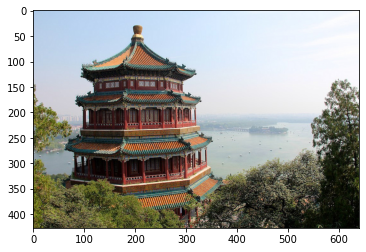

In [8]:
china = datasets.load_sample_image('china.jpg')
X = china/255 #Normalize the data
X = X.reshape(427*640, 3) #reshape the data
plt.imshow(china)

In [9]:
### YOUR CODE HERE

### Exercise 6: Implement DB-Outliers (Hard)
Another algorithm for finding outliers is Distance-Based Outlier Detection. It works by the following formula:
$$ OutlierSet(\varepsilon, \pi) = \Big\{ p \in X : \frac{|\{x\in X : dist(p, x) < \varepsilon\} |}{n} \leq \pi \Big\} $$
That is, a point $p$ is an outlier if at most $\pi$ percent of $x\in D$ has a distance of less than $\varepsilon$ to $p$. 

Implement a simple Distance Based Outlier Detection algorithm and test it on the below dataset. Try tuning the parameters $\pi$ and $\varepsilon$.

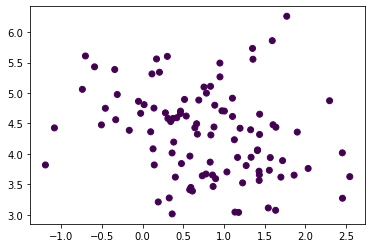

In [10]:
def db_outliers(X, eps, pi):
    outlier_set = [0 for _ in range(X.shape[0])]
    ### YOUR CODE HERE
    
    ### YOUR CODE HERE
    return outlier_set

X, _ = datasets.make_blobs(n_samples=100, centers=1, n_features=2, center_box=(0, 10), cluster_std=0.7)
#Add noise:
for i in np.random.randint(0, 100, size=10):
    X[i] = X[i] * 1.1

outliers = db_outliers(X, eps=1, pi=0.1) #Try tuning eps and pi
plt.scatter(*X.T, c=outliers)